# **DEEP LEARNING**

**UNIVERSIDAD MILITAR NUEVA GRANADA**

**DEEP LEARNING - REGRESIÓN LINEAL (Intro)**

Facultad de Ingeniería

# Librerías

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#from tensorflow.keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.regularizers import L1L2

# Dataset

Generar datos tipo Scatter en:

https://calmcode.io/labs/drawdata.html

Exportar como data.csv

In [ ]:
data = pd.read_csv('data.csv')

# Dividir dataset y aleatorizar
x_train, x_test = train_test_split(data, test_size=0.1, random_state=42)

# DATOS DE ENTRENAMIENTO

# Extraer el label de los datos y convertir a dataframe
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("z")
print(type(y_train))  # pandas.Series

# Features
x_train = (x_train/1000).to_numpy().astype('float32')

# Labels
y_train = np.fromiter(map(ord, y_train), int, count=len(y_train))-97    #ASCII a: 97, b:98, c: 99, d:100
y_train = np.reshape(y_train, (len(y_train),1)).astype('float32')

print(x_train.shape)
print(y_train.shape)

(891, 2)
(891, 1)


In [ ]:
# DATOS DE VALIDACIÓN

# Extraer el label de los datos y convertir a dataframe
y_test = x_test.pop("z")

# Features
x_test = (x_test/1000).to_numpy().astype('float32')

# Labels
y_test = np.fromiter(map(ord, y_test), int, count=len(y_test)) - 97
y_test = np.reshape(y_test, (len(y_test),1)).astype('float32')

print(x_test.shape)
print(y_test.shape)

(99, 2)
(99, 1)


# Graficar con Matplotlib

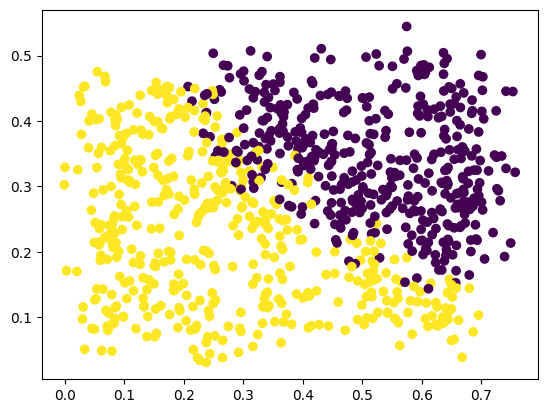

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0])
plt.show()

# Variables de clasificación

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

# Forward Pass

In [ ]:
def model(x_train):
  return tf.matmul(x_train, W) + b

# Función de pérdida

In [ ]:
def square_loss(y_train, predictions):
  per_sample_losses = tf.square(y_train - predictions)
  return tf.reduce_mean(per_sample_losses)

# Entrenamiento

In [ ]:
learning_rate = 0.1

def training_step(x_train, y_train):
  with tf.GradientTape() as tape:
    predictions = model(x_train)
    loss = square_loss(predictions, y_train)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [ ]:
for step in range(1000):
  loss = training_step(x_train, y_train)
  print(f"Loss at step {step}: {loss:.4f}")

# Predicciones

In [ ]:
predictions = model(x_test)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0] > 0.5)
plt.show()

<tf.Tensor: shape=(99, 1), dtype=float32, numpy=
array([[ 2.0861447e-01],
       [-1.1002910e-01],
       [ 6.0786057e-01],
       [ 8.5476518e-02],
       [ 4.3868136e-01],
       [ 7.1665454e-01],
       [-3.5850167e-02],
       [ 4.7484982e-01],
       [ 3.8928080e-01],
       [ 5.5571687e-01],
       [-2.0642436e-01],
       [ 3.7611258e-01],
       [ 4.7131169e-01],
       [ 5.2835691e-01],
       [ 1.1560931e+00],
       [ 3.9079392e-01],
       [ 1.1316607e+00],
       [ 6.5920234e-01],
       [ 5.2725315e-01],
       [ 5.8077466e-01],
       [ 3.6308420e-01],
       [ 5.6784582e-01],
       [ 5.5220902e-01],
       [ 6.4465141e-01],
       [ 5.9193492e-01],
       [ 7.3438931e-01],
       [ 1.1430886e+00],
       [ 5.2569485e-01],
       [ 3.6189306e-01],
       [ 6.7401791e-01],
       [ 1.0637803e+00],
       [ 4.5195603e-01],
       [ 7.3328346e-01],
       [ 7.3930550e-01],
       [ 1.0842974e+00],
       [ 9.0744954e-01],
       [-2.5355816e-04],
       [ 7.8921562e-01],
 

# Separar las clases

$y = [w_1    w_2][x_1    x_2] + b$

Tomando una clase binaria como la región superior (>0.5) y la otra como la región inferior (<0.5), se tiene:

**Clase 0**

$w_1x_1 + w_2x2 + b < 0.5$

**Clase 1**

$w_1x_1 + w_2x2 + b > 0.5$

Las dos clases están separadas por una línea recta dada por:

$x_2 = -w1x_1/w2_2 + (0.5 - b)/w_2$

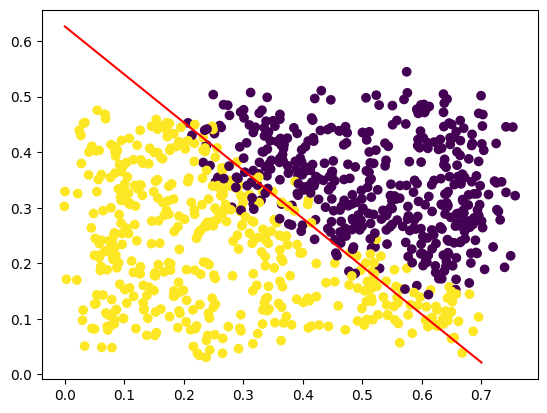

In [ ]:
x1 = np.linspace(0.0, 0.7, 100)              # Puntos de evaluación para x1 (para la líena de frontera)
x2 = - W[0] / W[1] * x + (0.5 - b) / W[1]    # Cálculo de los puntos correspondientes de x2 (para la líena de frontera)
plt.plot(x1, x2, "-r")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:, 0] > 0.5)

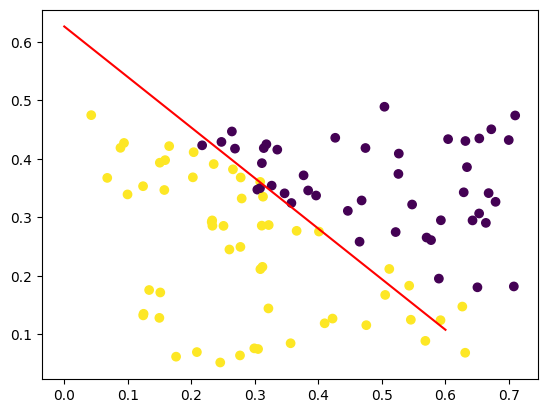

In [ ]:
x = np.linspace(0.0, 0.6, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test[:, 0] > 0.5)